
# Numpy을 활용한 머신러닝 구현 - KNN 분류기

### *Objective*

1. KNN 알고리즘 개괄 : 머신러닝 방법론 중 간단하면서 중요한 방법론인 KNN(K Nearest Neighborhood)의 개념을 배웁니다.
2. KNN Numpy로 구현 : Numpy를 이용하여 KNN을 구현해봅니다.

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# [ 1. KNN 알고리즘 개괄 ]

분류 항목을 이미 알고 있는 데이터 집합에서 상위 K개의 가장 유사한 데이터를 살펴보고, K개의 가장 유사한 데이터들 중 다수결(majority vote)를 통해 새로운 데이터의 분류 항목을 결정하는 알고리즘입니다.

In [4]:
# 0번째 열 : 킥 횟수, 1번째 열 : 키스 횟수
dataset = np.array([
    [3, 104],
    [2, 100],
    [1, 81],
    [101, 10],
    [99, 5],
    [98, 2],
])

labels = np.array(['Romance','Romance','Romance',
          'Action','Action','Action'])

inX = np.array([25, 87])

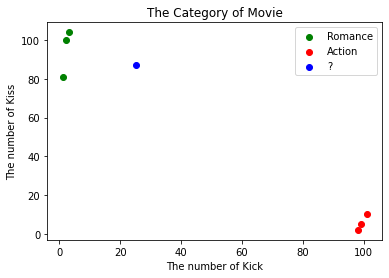

In [20]:
plt.title("The Category of Movie")
plt.scatter(dataset[:3,0],dataset[:3,1],label='Romance',
            c='g')
plt.scatter(dataset[3:,0],dataset[3:,1],label='Action',
            c='r')
plt.scatter(25,87,label="?",
            c='b')


plt.xlabel('The number of Kick')
plt.ylabel('The number of Kiss')
plt.legend()
plt.show()

# [ 2. KNN Numpy로 구현 ]
KNN의 알고리즘 순서는 다음과 같습니다.

1. 우리가 분류항목을 알고자 하는 점(inX)와 알고 있는 점들(dataset)과의 모든 점 거리를 계산
2. 오름 차순으로 거리의 길이를 정렬
3. inX와의 거리가 가장 짧은 K개의 아이템 추출
4. K개의 아이템에서 가장 많은 분류 항목 찾기
5. 해당 항목 반환

KNN의 각 단계별로 코드를 작성해 봅시다.

## 1. 각 단계별로 Numpy Code 작성하기
### (1) 우리가 분류항목을 알고자 하는 점 (inX)와 알고 있는 점들(dataset)과의 모든 점 거리를 계산
거리 공식은 아래와 같습니다.

우리는 알고자 하는 점(inX)와 알고 있는 점들(dataset) 전부와의 거리를 측정해야 합니다

$$
point1 = (x_1,y_1), point2 = (x_2,y_2)distance\_between\_point1\_and\_point2 = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}
$$

In [21]:

# broadcasting을 이용하면 보다 간결하고 빠른 코드를 작성할 수 있습니다.
## ⚠️⚠️⚠️ 반복문, 순회문 사용하지 않고 numpy broadcasting 을 사용해 구현하세요. ⚠️⚠️⚠️

# 위 정의한 inX와 그 이외의 모든 점들과의 거리를 계산합니다. 
# 거리는 위 정의한 l2 distance 을 사용합니다. 
dists = np.sqrt(np.sum((dataset-inX)**2, axis=1))## fix me ##

### (2) 오름 차순으로 거리의 길이를 정렬

In [23]:
# 오름차순으로 정렬된 인덱스 순을 반환
# numpy 을 사용해 위 생성한 거리(dists) 에서 거리가 가장 짧은 데이터의 index을 정렬(sort) 합니다. 
sorted_index = np.lexsort((dists,dists))## fix me ## 
sorted_index

array([2, 1, 0, 3, 4, 5], dtype=int64)

### (3) inX와의 거리가 가장 짧은 K개의 아이템 추출

In [10]:
# 위 생성한 sorted index 을 사용해 거리가 가장 짧은 순서대로 labels 을 나열합니다. 
sorted_labels = [labels[i] for i in sorted_index]
# 위 생성한 sorted_labels 을 활용해 거리가 가장 가까운 k=4 개의 데이터를 가져옵니다. 
K_nearest_labels = sorted_labels[:4]## fix me ##

In [24]:
K_nearest_labels

['Romance', 'Romance', 'Romance', 'Action']

### (4) K개의 아이템에서 가장 많은 분류 항목 찾기

In [27]:
# K 개의 아이템에서 각 항목이 몇번씩 등작했는지 count합니다. 
count_dict = {}
for label in K_nearest_labels:
    count_dict[label] = count_dict.get(label,0) + 1
    ## fix me ##

count_dict


{'Romance': 3, 'Action': 1}

In [26]:
# 제일 많이 등장한 횟수를 찾아 반환합니다. 
# 해당 예제에서는 Romance 을 반환해야 합니다. 
# np.unique 함수를 사용해야 합니다
_labels, count_labels = np.unique(K_nearest_labels, return_counts=True)## fix me ## 
print(_labels[count_labels.argmax()])

Romance


## 2. 전체 Numpy Code 작성하기

In [14]:

def classify_knn(inX, dataset, labels, K):
    dists = np.sqrt(np.sum((dataset-inX)**2, axis=1))
    sorted_index = np.lexsort((dists,dists))
    sorted_labels = [labels[i] for i in sorted_index]
    K_nearest_labels = sorted_labels[:4]
    _labels, count_labels = np.unique(K_nearest_labels, return_counts=True)## fix me ## 
    ## fix me ## 
    return _labels[count_labels.argmax()]

In [ ]:
# 아래 function 이 작동하도록 설계하시오.

In [16]:
# 킥 횟수가 52번, 키스 횟수가 10번인 작품
classify_knn([52, 10], dataset, labels, 4)

'Action'

In [17]:
# 킥 횟수가 19번, 키스 횟수가 72번인 작품
classify_knn([19, 72], dataset, labels, 4)

'Romance'